# Part1: process input ACS data

In [1]:
bay_acs_2 <- read.csv(file="data/bay_acs_factored.csv",sep=",")

In [2]:
str(bay_acs_2)

'data.frame':	23895 obs. of  8 variables:
 $ X            : int  0 1 2 3 4 5 6 7 8 9 ...
 $ SEX          : int  1 2 1 2 1 2 2 1 1 2 ...
 $ VEH          : int  2 2 1 1 0 1 1 2 0 2 ...
 $ SEX_S        : int  2 2 2 2 2 1 1 2 2 1 ...
 $ AGE_index    : int  19 9 15 13 10 15 12 19 9 9 ...
 $ AGE_S_index  : int  16 9 13 6 9 8 12 20 9 9 ...
 $ PINCP_index  : int  6 2 8 5 5 5 8 8 4 5 ...
 $ PINCP_S_index: int  6 1 8 1 4 2 8 8 2 4 ...


In [3]:
colnames(bay_acs_2)[which(colnames(bay_acs_2) %in% c("X1","X2","X3") )] <- c("AGE","SEX","VEH")
colnames(bay_acs_2)[which(colnames(bay_acs_2) %in% c("X4","X5") )] <- c("JWTR","PINCP")
colnames(bay_acs_2)[which(colnames(bay_acs_2) %in% c("X6","X7","X8") )] <- c("AGE_S","SEX_S","VEH_S")
colnames(bay_acs_2)[which(colnames(bay_acs_2) %in% c("X9","X10") )] <- c("JWTR_S","PINCP_S")

In [4]:
bay_acs_2[,c("X")] <- list(NULL)
data <- lapply(bay_acs_2, factor)
data <-as.data.frame(data)
str(data)

'data.frame':	23895 obs. of  7 variables:
 $ SEX          : Factor w/ 2 levels "1","2": 1 2 1 2 1 2 2 1 1 2 ...
 $ VEH          : Factor w/ 7 levels "0","1","2","3",..: 3 3 2 2 1 2 2 3 1 3 ...
 $ SEX_S        : Factor w/ 2 levels "1","2": 2 2 2 2 2 1 1 2 2 1 ...
 $ AGE_index    : Factor w/ 20 levels "4","5","6","7",..: 16 6 12 10 7 12 9 16 6 6 ...
 $ AGE_S_index  : Factor w/ 20 levels "4","5","6","7",..: 13 6 10 3 6 5 9 17 6 6 ...
 $ PINCP_index  : Factor w/ 8 levels "1","2","3","4",..: 6 2 8 5 5 5 8 8 4 5 ...
 $ PINCP_S_index: Factor w/ 8 levels "1","2","3","4",..: 6 1 8 1 4 2 8 8 2 4 ...


# Part 2: bnlearn

In [5]:
# install.packages("bnlearn", repos = "http://cran.us.r-project.org")
library(bnlearn, quietly = T)


Attaching package: ‘bnlearn’

The following object is masked from ‘package:stats’:

    sigma



In [6]:
whitelist = data.frame(from = c("SEX"), to = c("PINCP_index"))
whitelist
bn.hc <- hc(data[complete.cases(data),],whitelist = whitelist)
#bn.hc <- hc(data,whitelist = whitelist)

,from,to
1,SEX,PINCP_index


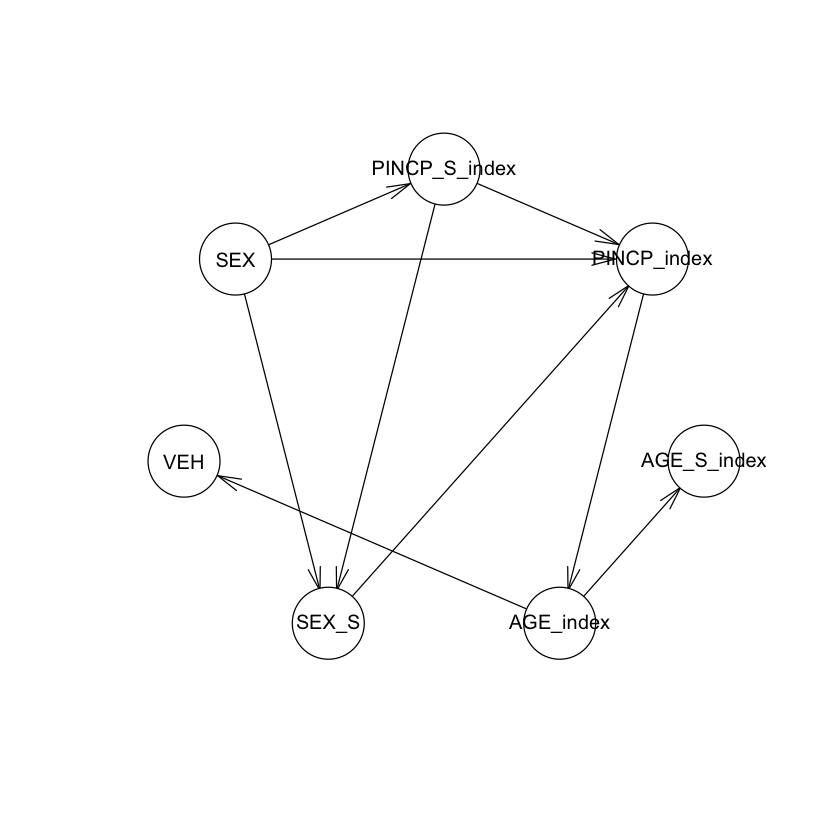

In [7]:
plot(bn.hc)

# Part3:plot

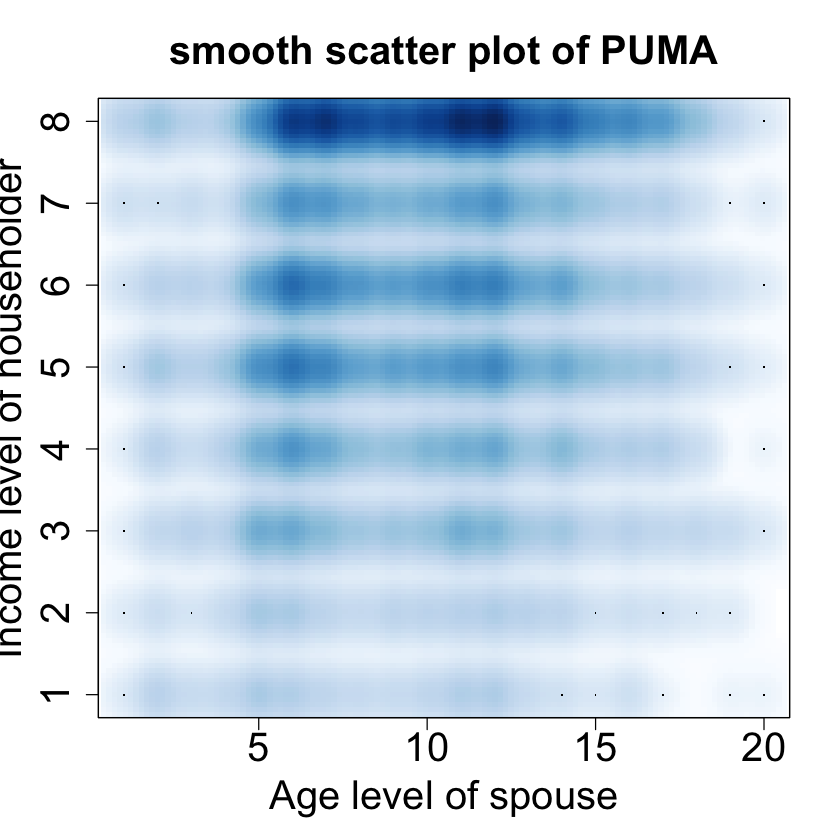

In [8]:
#install.packages("hexbin", repos = "http://cran.us.r-project.org")
library(hexbin)
smoothScatter(data$AGE_S_index, data$PINCP_index,main='smooth scatter plot of PUMA',xlab='Age level of spouse',ylab='Income level of householder',cex.main=2, cex.lab=2,cex.axis=2)

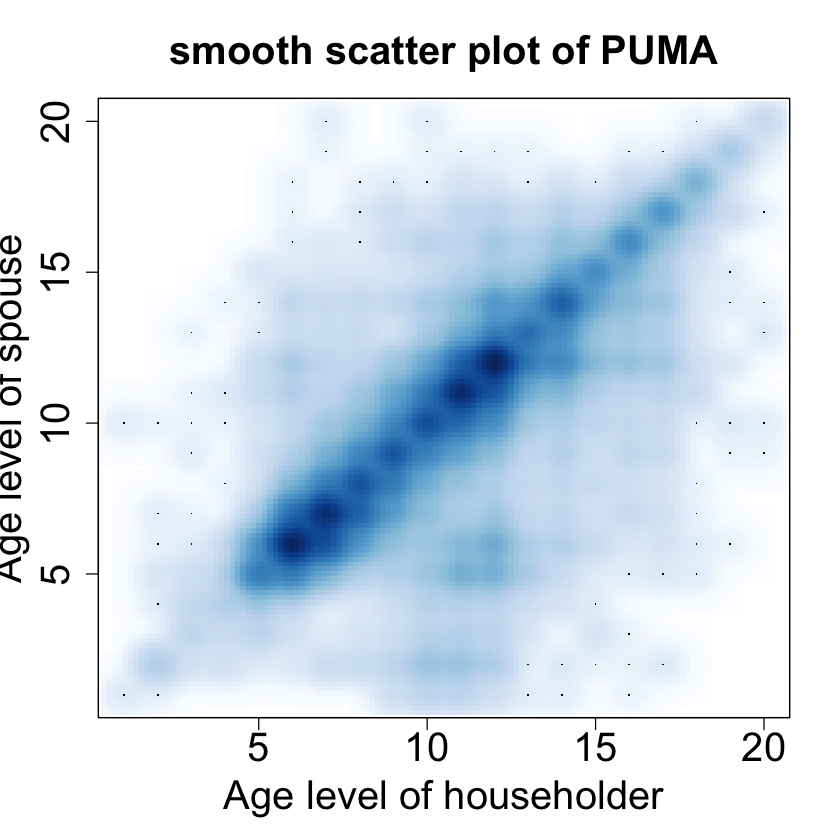

In [9]:
smoothScatter(data$AGE_index, data$AGE_S_index,main='smooth scatter plot of PUMA',xlab='Age level of householder',ylab='Age level of spouse',cex.main=2, cex.lab=2,cex.axis=2)

# Part4:simulation

In [10]:
fit = bn.fit(bn.hc,data[complete.cases(data),] )

In [11]:
fit$SEX


  Parameters of node SEX (multinomial distribution)

Conditional probability table:
         1         2 
0.6063612 0.3936388 

In [12]:
methods(simulate)
sim = rbn(fit, n = 1000000, debug = FALSE)
str(sim)

[1] simulate.lm*
see '?methods' for accessing help and source code

'data.frame':	1000000 obs. of  7 variables:
 $ SEX          : Factor w/ 2 levels "1","2": 2 1 1 1 1 2 1 2 1 1 ...
 $ VEH          : Factor w/ 7 levels "0","1","2","3",..: 3 3 3 4 3 3 7 3 2 3 ...
 $ SEX_S        : Factor w/ 2 levels "1","2": 1 2 1 2 2 2 2 1 1 2 ...
 $ AGE_index    : Factor w/ 20 levels "4","5","6","7",..: 5 7 6 11 11 17 16 10 10 6 ...
 $ AGE_S_index  : Factor w/ 20 levels "4","5","6","7",..: 5 7 7 12 11 17 16 4 10 11 ...
 $ PINCP_index  : Factor w/ 8 levels "1","2","3","4",..: 4 8 8 8 8 8 8 8 4 5 ...
 $ PINCP_S_index: Factor w/ 8 levels "1","2","3","4",..: 4 3 6 6 8 8 6 7 4 3 ...


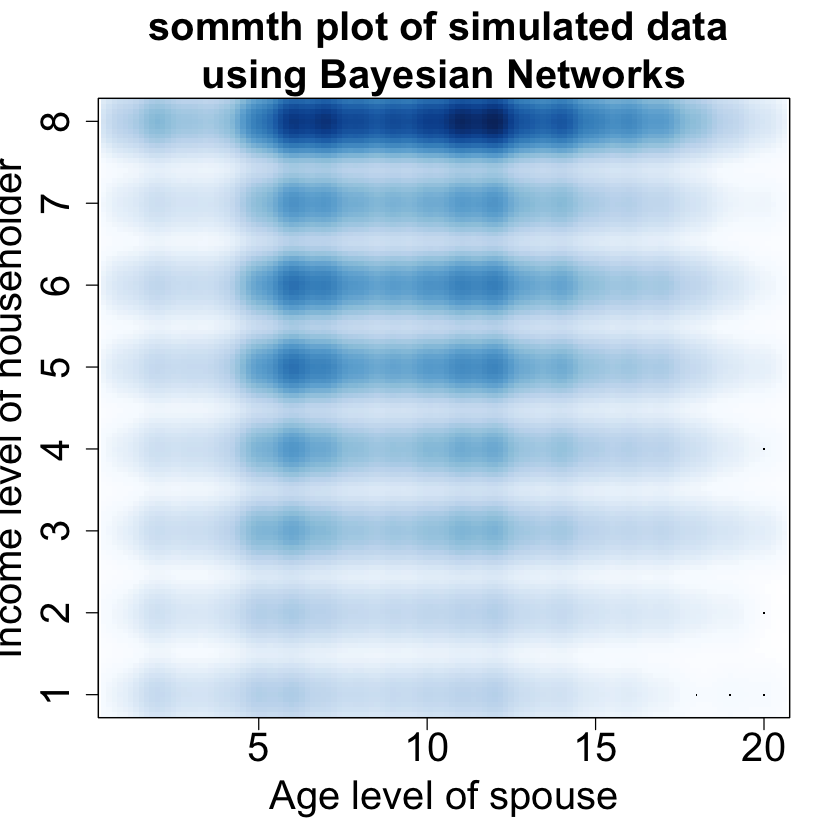

In [13]:
# http://www.uni-kiel.de/psychologie/rexrepos/posts/diagDistributions.html
smoothScatter(sim$AGE_S_index, sim$PINCP_index,main = 'sommth plot of simulated data \nusing Bayesian Networks',xlab='Age level of spouse',ylab='Income level of householder',cex.main=2, cex.lab=2,cex.axis=2)

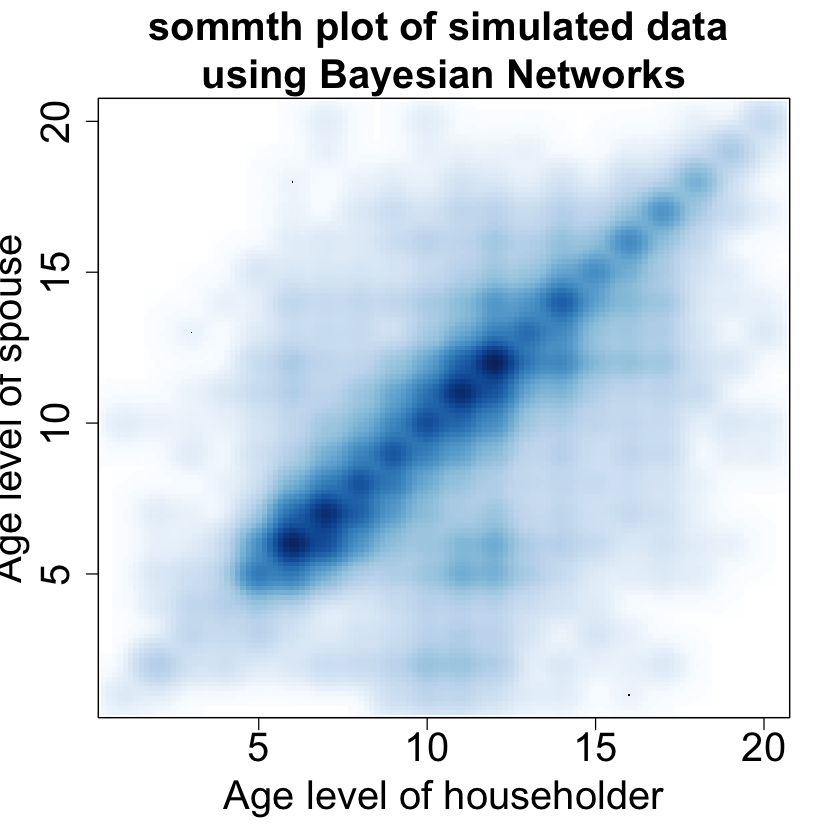

In [14]:
smoothScatter(sim$AGE_index, sim$AGE_S_index,main = 'sommth plot of simulated data \nusing Bayesian Networks',xlab='Age level of householder',ylab='Age level of spouse',cex.main=2, cex.lab=2,cex.axis=2)

In [16]:
write.csv(sim, file = "../output/bnlearn/bnlearn_run1.csv",row.names=TRUE)